In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline


In [2]:
df=pd.read_csv(r"C:\Users\Aman\Downloads\clustering\Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
X=df.iloc[:,3:]

In [4]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [8]:
wcss=[]
for i in range(1,20):
    kmean=KMeans(n_clusters=i, init="k-means++",random_state=100)
    kmean.fit(X)
    wcss.append(kmean.inertia_)

In [31]:
wcss

[269981.28,
 181363.595959596,
 106348.37306211119,
 73679.78903948837,
 44448.45544793371,
 37265.86520484347,
 30259.65720728547,
 25095.703209997548,
 21826.93630323165,
 19634.55462934998,
 17595.288881085184,
 15832.39918050798,
 14321.881821120058,
 12880.882370570607,
 11810.44602064602,
 10794.253525641026,
 9964.370098022328,
 9229.361482549846,
 8608.582752034983]

Text(0, 0.5, 'WCSS or Inetria')

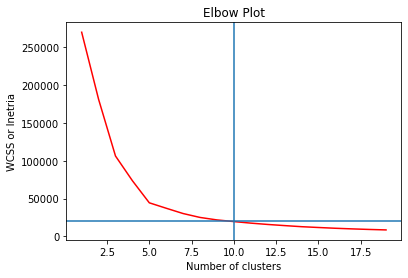

In [10]:
plt.figure()
plt.plot(range(1,20), wcss, color="r")
plt.axvline(x=10)
plt.axhline(y=21000)
plt.title("Elbow Plot")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS or Inetria")

#### Dispersion point is a point at which no major changes happends
##### Dispersion point is at 10

In [47]:
k_mean=KMeans(n_clusters=10, init="k-means++",random_state=100)

In [48]:
k_mean.fit(X)

KMeans(n_clusters=10, random_state=100)

In [49]:
X["Cluster_no"]=k_mean.predict(X)

In [16]:
X[X["Cluster_no"]==4]

,Annual Income (k$),Spending Score (1-100),Cluster_no
0,15,39,4
4,17,40,4
16,21,35,4
18,23,29,4
20,24,35,4
26,28,32,4
28,29,31,4
38,37,26,4
40,38,35,4
42,39,36,4


### Mini Batch K Means

In [21]:
X=df.iloc[:,3:]

In [22]:
mini_kmean=MiniBatchKMeans(n_clusters=10)

In [23]:
mini_kmean.fit(X)

MiniBatchKMeans(n_clusters=10)

In [26]:
mini_kmean.predict([[55,31]])

array([8])

In [35]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


### DBSCAN

In [39]:
dbscan=DBSCAN(eps=0.2,min_samples=2)

In [40]:
dbscan.fit(X)

DBSCAN(eps=0.2, min_samples=2)

In [42]:
set(dbscan.labels_)

{-1, 0, 1, 2, 3}

In [ ]:
# -1 is Noise point or outliers

In [43]:
X["CLuster Number"]=dbscan.labels_

In [50]:
X

,Annual Income (k$),Spending Score (1-100),CLuster Number,Cluster_no
0,15,39,-1,4
1,15,81,-1,0
2,16,6,-1,9
3,16,77,-1,0
4,17,40,-1,4
...,...,...,...,...
195,120,79,-1,7
196,126,28,-1,2
197,126,74,-1,7
198,137,18,-1,2


In [51]:
ground_truth_label=X["Cluster_no"]
predicted_labels=X["CLuster Number"]
metrics.rand_score(ground_truth_label,predicted_labels)

0.18874371859296482

In [53]:
metrics.adjusted_rand_score(ground_truth_label,predicted_labels)

-0.001657698069477653

In [55]:
metrics.jaccard_score(ground_truth_label,predicted_labels, average="weighted")

0.0